<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data acquisition**](#Section41)
  - **4.2** [**Data description and information**](#Section42)

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Data Pre-profiling**](#Section51)<br>
  
**6.** [**Exploratory Data Analysis**](#Section6)<br>

**7.** [**Post Data Processing**](#Section7)<br>
  - **7.1** [**Data Encoding**](#Section71)<br> 
  - **7.2** [**Data Scaling**](#Section72)<br>
  - **7.3** [**Data Preparation**](#Section73)<br>

**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Conclusion**](#Section91)<br>
  - **9.2** [**Actionable Insights**](#Section92)<br>

---
<a name = Section1></a>
# **1. Introduction**
---

- **ECorp** is an American multinational technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence.

- They are spread across the globe with hundreds of thousands of employees in these domains.
- When an employee at any company starts working, they first need to obtain the resource access necessary to fulfill their role. Employees passing certain criteria regarding their primary and secondary roles are granted access to the requested resources. This efficient system has helped the company maintain background checks of its employees and usage of allocated resources.

**Current Scenario**
A group of employees has been invited to test the automated system. An auto-access model seeks to minimize the human involvement required to grant or revoke employee access.


---
<a name = Section2></a>
# **2. Problem Statement**
---

- If an employee discovers that they need access to certain resources, they are supposed to contact a knowledgeable supervisor.

- The supervisor takes time to manually grant the needed access to the requesting employee.

- As employees move throughout a company, this access discovery/recovery cycle wastes a non-trivial amount of time and money.


<a name = Section21></a>
### **Scenario**

- The current process suffers from the following problems:

    - The current process is a manual task which wastes a non-trivial amount of time and money.
    
- **Objective**:

    - Given is a dataset containing the ACTION (ground truth), RESOURCE, and information about the employee's role at the time of approval.
    
    - The model will take an employee's role information and the requested resource in the form of a resource code and will determine if an employee should be given access or not.
    
    - Task is to build a binary-class classification model using the dataset.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [7]:
!pip install -q datascience                              # Package that is required by pandas profiling
!pip install -q pandas-profiling                         # Library to generate basic statistics about data
!pip install -q yellowbrick                               # Toolbox for Measuring Machine Performance

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [8]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade yellowbrick

<a name = Section33></a>
### **3.3 Importing Libraries**

In [22]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                               # Importing for panel data analysis
from pandas_profiling import ProfileReport                                        # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                                        # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                                       # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                                           # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                                    # Removing restriction over chained assignments operations
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                                # Importing package numpys (For Numerical Python)
import string                                                                     # For string related operations
import pprint                                                                     # For printing of Collections line by line
from collections import Counter                                                   # For estimating frequency
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                                   # Importing pyplot interface using matplotlib                                              
import seaborn as sns                                                             # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import precision_recall_curve,accuracy_score                 # For precision and recall metric estimation
from sklearn.metrics import classification_report                                 # To generate complete report of evaluation metrics
from sklearn.metrics import plot_confusion_matrix,roc_auc_score                   # To plot confusion matrix 
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                              # To split the data in training and testing part 
from sklearn.preprocessing import StandardScaler                                  # Importing Standard Scaler library from preprocessing.     
from sklearn.ensemble import RandomForestClassifier, VotingClassifier             # Loading differernt ensemble models
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier                 # Loading differernt ensemble models
from sklearn.tree import DecisionTreeClassifier                                   # Loading decision tree classifier from tree
from sklearn.svm import SVC                                                       # Loading SVM from  Sklearn
from sklearn.linear_model import LogisticRegression                               # Loading Logistic regression from linear model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                            
from sklearn.model_selection import cross_val_score                               # Importing cross validation score from model selection
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
#from mlxtend.classifier import StackingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")     

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

    | Column Name  | Description |
 
    | RESOURCE	| An ID for each resource.|
    | MGR_ID	| The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time.|
    | ROLE_ROLLUP_1	| Company role grouping category id 1 (e.g. US Engineering).|
    | ROLE_ROLLUP_2	| Company role grouping category id 2 (e.g. US Retail).|
    | ROLE_DEPTNAME	| Company role department description (e.g. Retail).|
    | ROLE_TITLE	| Company role business title description (e.g. Senior Engineering Retail Manager)|
    | ROLE_FAMILY_DESC	| Company role family extended description (e.g. Retail Manager, Software Engineering)
    | ROLE_FAMILY	| Company role family description (e.g. Retail Manager).|
    | ROLE_CODE	| Company role code; this code is unique to each role (e.g. Manager)|
    | ID	| ID of the Employee|

<a name = Section41></a>
# **4.1 Data Acquisition**

In [23]:
# Load the data
train_data = pd.read_csv('ea_train.csv')
test_data = pd.read_csv('ea_test.csv')
# Get the dimesions of data
print('Shape of the Train dataset:', train_data.shape)
print('Shape of the Test dataset:', test_data.shape)
train_data.head()

Shape of the Train dataset: (24576, 11)
Shape of the Test dataset: (8193, 10)


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
0,75078,255037,118315,118316,118202,118784,262095,290919,118786,2270,1
1,79323,3120,117961,118300,120312,120313,120314,118424,120315,696,1
2,34958,8243,118555,118178,118320,117905,117906,290919,117908,13514,1
3,39371,7520,117961,118343,124725,117905,240983,290919,117908,13400,1
4,39330,17290,117961,118386,118522,117905,117906,290919,117908,6703,1


In [52]:
test_data.shape

(8193, 10)

In [69]:
train_data.shape

(24576, 11)

In [24]:
#Storing the id from the test data set
store_id=test_data.ID

In [25]:
store_id.size

8193

<a name = Section42></a>
# **4.2 Data Description and information**

In [5]:
train_data.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
count,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000
mean,42881.130371,25893.693278,116955.370443,118260.892741,118854.659098,125661.492594,169860.284505,183598.044556,119765.312378,16367.649292,0.941895
std,34262.362668,35746.796709,10950.867471,4841.345712,18639.574571,30491.343035,69329.221486,100563.091506,5559.507074,9464.173852,0.233948
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,0.000000,0.000000
25%,20299.000000,4564.000000,117961.000000,118102.000000,118391.000000,118274.000000,117906.000000,118363.000000,118209.000000,8149.750000,1.000000
50%,35210.000000,13441.000000,117961.000000,118300.000000,118910.000000,118568.000000,128628.000000,119095.000000,118570.000000,16403.500000,1.000000
75%,74189.250000,41786.000000,117961.000000,118386.000000,120428.000000,120006.000000,233714.000000,290919.000000,119353.000000,24524.250000,1.000000
max,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000,32768.000000,1.000000


In [70]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24576 entries, 0 to 24575
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          24576 non-null  int64
 1   MGR_ID            24576 non-null  int64
 2   ROLE_ROLLUP_1     24576 non-null  int64
 3   ROLE_ROLLUP_2     24576 non-null  int64
 4   ROLE_DEPTNAME     24576 non-null  int64
 5   ROLE_TITLE        24576 non-null  int64
 6   ROLE_FAMILY_DESC  24576 non-null  int64
 7   ROLE_FAMILY       24576 non-null  int64
 8   ROLE_CODE         24576 non-null  int64
 9   ID                24576 non-null  int64
 10  ACTION            24576 non-null  int64
dtypes: int64(11)
memory usage: 2.1 MB


# Observation:-
- There are no duplicate values in the dataset

In [8]:
train_data.corr()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ID,ACTION
RESOURCE,1.000000,0.010474,-0.001956,0.014442,0.023536,0.003053,0.017024,0.028848,0.008547,-0.000602,0.004709
MGR_ID,0.010474,1.000000,-0.008580,-0.002313,-0.009085,0.022017,-0.016599,-0.119074,-0.000415,0.002616,-0.005475
ROLE_ROLLUP_1,-0.001956,-0.008580,1.000000,0.029774,-0.010653,0.013483,-0.003518,0.022586,-0.023343,0.004558,-0.010529
ROLE_ROLLUP_2,0.014442,-0.002313,0.029774,1.000000,-0.002915,0.009828,0.018436,0.074391,0.015300,-0.008206,0.003042
ROLE_DEPTNAME,0.023536,-0.009085,-0.010653,-0.002915,1.000000,-0.006572,-0.007259,0.025275,0.014705,-0.009100,0.003436
ROLE_TITLE,0.003053,0.022017,0.013483,0.009828,-0.006572,1.000000,0.168525,-0.017607,0.148421,-0.004786,-0.010021
ROLE_FAMILY_DESC,0.017024,-0.016599,-0.003518,0.018436,-0.007259,0.168525,1.000000,-0.181645,0.095046,0.001997,0.009278
ROLE_FAMILY,0.028848,-0.119074,0.022586,0.074391,0.025275,-0.017607,-0.181645,1.000000,-0.151298,0.000636,0.003252
ROLE_CODE,0.008547,-0.000415,-0.023343,0.015300,0.014705,0.148421,0.095046,-0.151298,1.000000,-0.004858,0.015459
ID,-0.000602,0.002616,0.004558,-0.008206,-0.009100,-0.004786,0.001997,0.000636,-0.004858,1.000000,-0.000760


In [33]:
train_data.ROLE_DEPTNAME.nunique()

440

In [30]:
train_data[train_data.ROLE_ROLLUP_1==train_data.ROLE_ROLLUP_2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 3106 to 23858
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          7 non-null      int64
 1   MGR_ID            7 non-null      int64
 2   ROLE_ROLLUP_1     7 non-null      int64
 3   ROLE_ROLLUP_2     7 non-null      int64
 4   ROLE_DEPTNAME     7 non-null      int64
 5   ROLE_TITLE        7 non-null      int64
 6   ROLE_FAMILY_DESC  7 non-null      int64
 7   ROLE_FAMILY       7 non-null      int64
 8   ROLE_CODE         7 non-null      int64
 9   ID                7 non-null      int64
 10  ACTION            7 non-null      int64
dtypes: int64(11)
memory usage: 672.0 bytes


<a name = Section5></a>

---
# **5. Data Pre-Processing**
---
<a name = Section51></a>
### **5.1 Data Pre-Profiling**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive HTML report.

In [11]:
profile = ProfileReport(df = train_data)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


# **Observations**
- There are **2851** rows with **no duplicates** and **no missing values**.
- There are **22** features incuding **21** Numeric and **01** categorical feature.
- The target variable label is balanced.

<a name = Section6></a>

---
# **6. EDA**
---

# Univariate Analysis

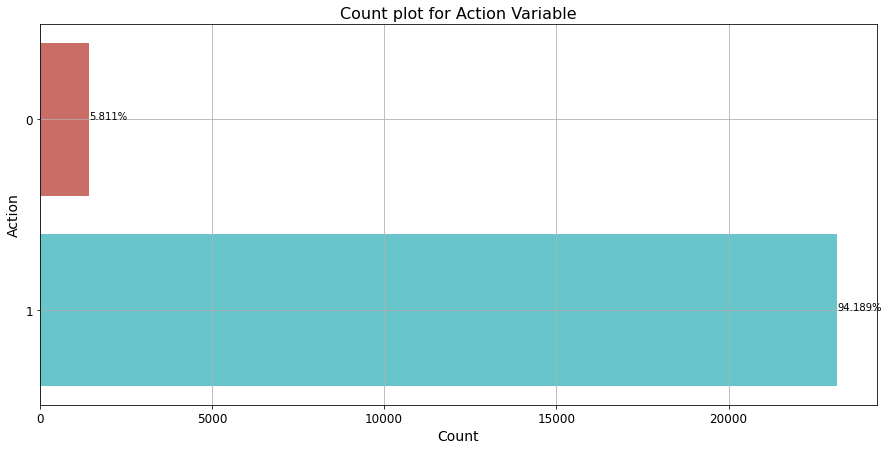

In [14]:
#Create a figure of 15 x 7 inches
fig = plt.figure(figsize=(15, 7))
# Create a countplot for Type feature
ax = sns.countplot(y='ACTION', data=train_data, palette='hls')
# Adding percentages to the bars
total = train_data.shape[0]
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

# Adding some cosmetics
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel(xlabel="Count", size=14)
plt.ylabel(ylabel='Action', size=14)
plt.title(label="Count plot for Action Variable", size=16)
plt.grid(b=True)
# Display the output
plt.show()

- Data appears to be highly skewed

- **SD,IQR and sfm**  of male population appears to be normally distributed whilst for female data it is **skewed** to the right

# Bivariate Analysis

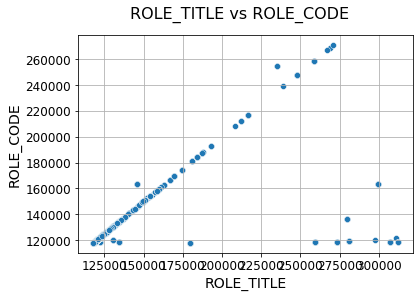

In [20]:
#sns.jointplot(x='sfm', y='sd', kind="hex", color="#4CB391", data=train_data, size=5)
sns.scatterplot(x='ROLE_TITLE', y='ROLE_CODE', data=train_data)
# Add cosmetics
plt.xlabel(xlabel='ROLE_TITLE', fontsize=14)
plt.ylabel(ylabel='ROLE_CODE', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle(t='ROLE_TITLE vs ROLE_CODE', fontsize=16)
plt.grid(b=True)

  # Display the output
plt.show()

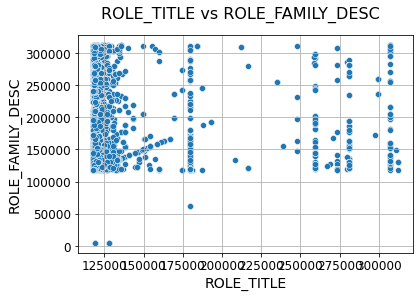

In [22]:
#sns.jointplot(x='sfm', y='sd', kind="hex", color="#4CB391", data=train_data, size=5)
sns.scatterplot(x='ROLE_TITLE', y='ROLE_FAMILY_DESC', data=train_data)
# Add cosmetics
plt.xlabel(xlabel='ROLE_TITLE', fontsize=14)
plt.ylabel(ylabel='ROLE_FAMILY_DESC', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.suptitle(t='ROLE_TITLE vs ROLE_FAMILY_DESC', fontsize=16)
plt.grid(b=True)

  # Display the output
plt.show()

# **Observation**-:
While centroid exhibits a **strong positive** correlation with median and Q25 values it exhibit a **negative correlation** with sfm and spectral flatness

# Multivariate Analysis

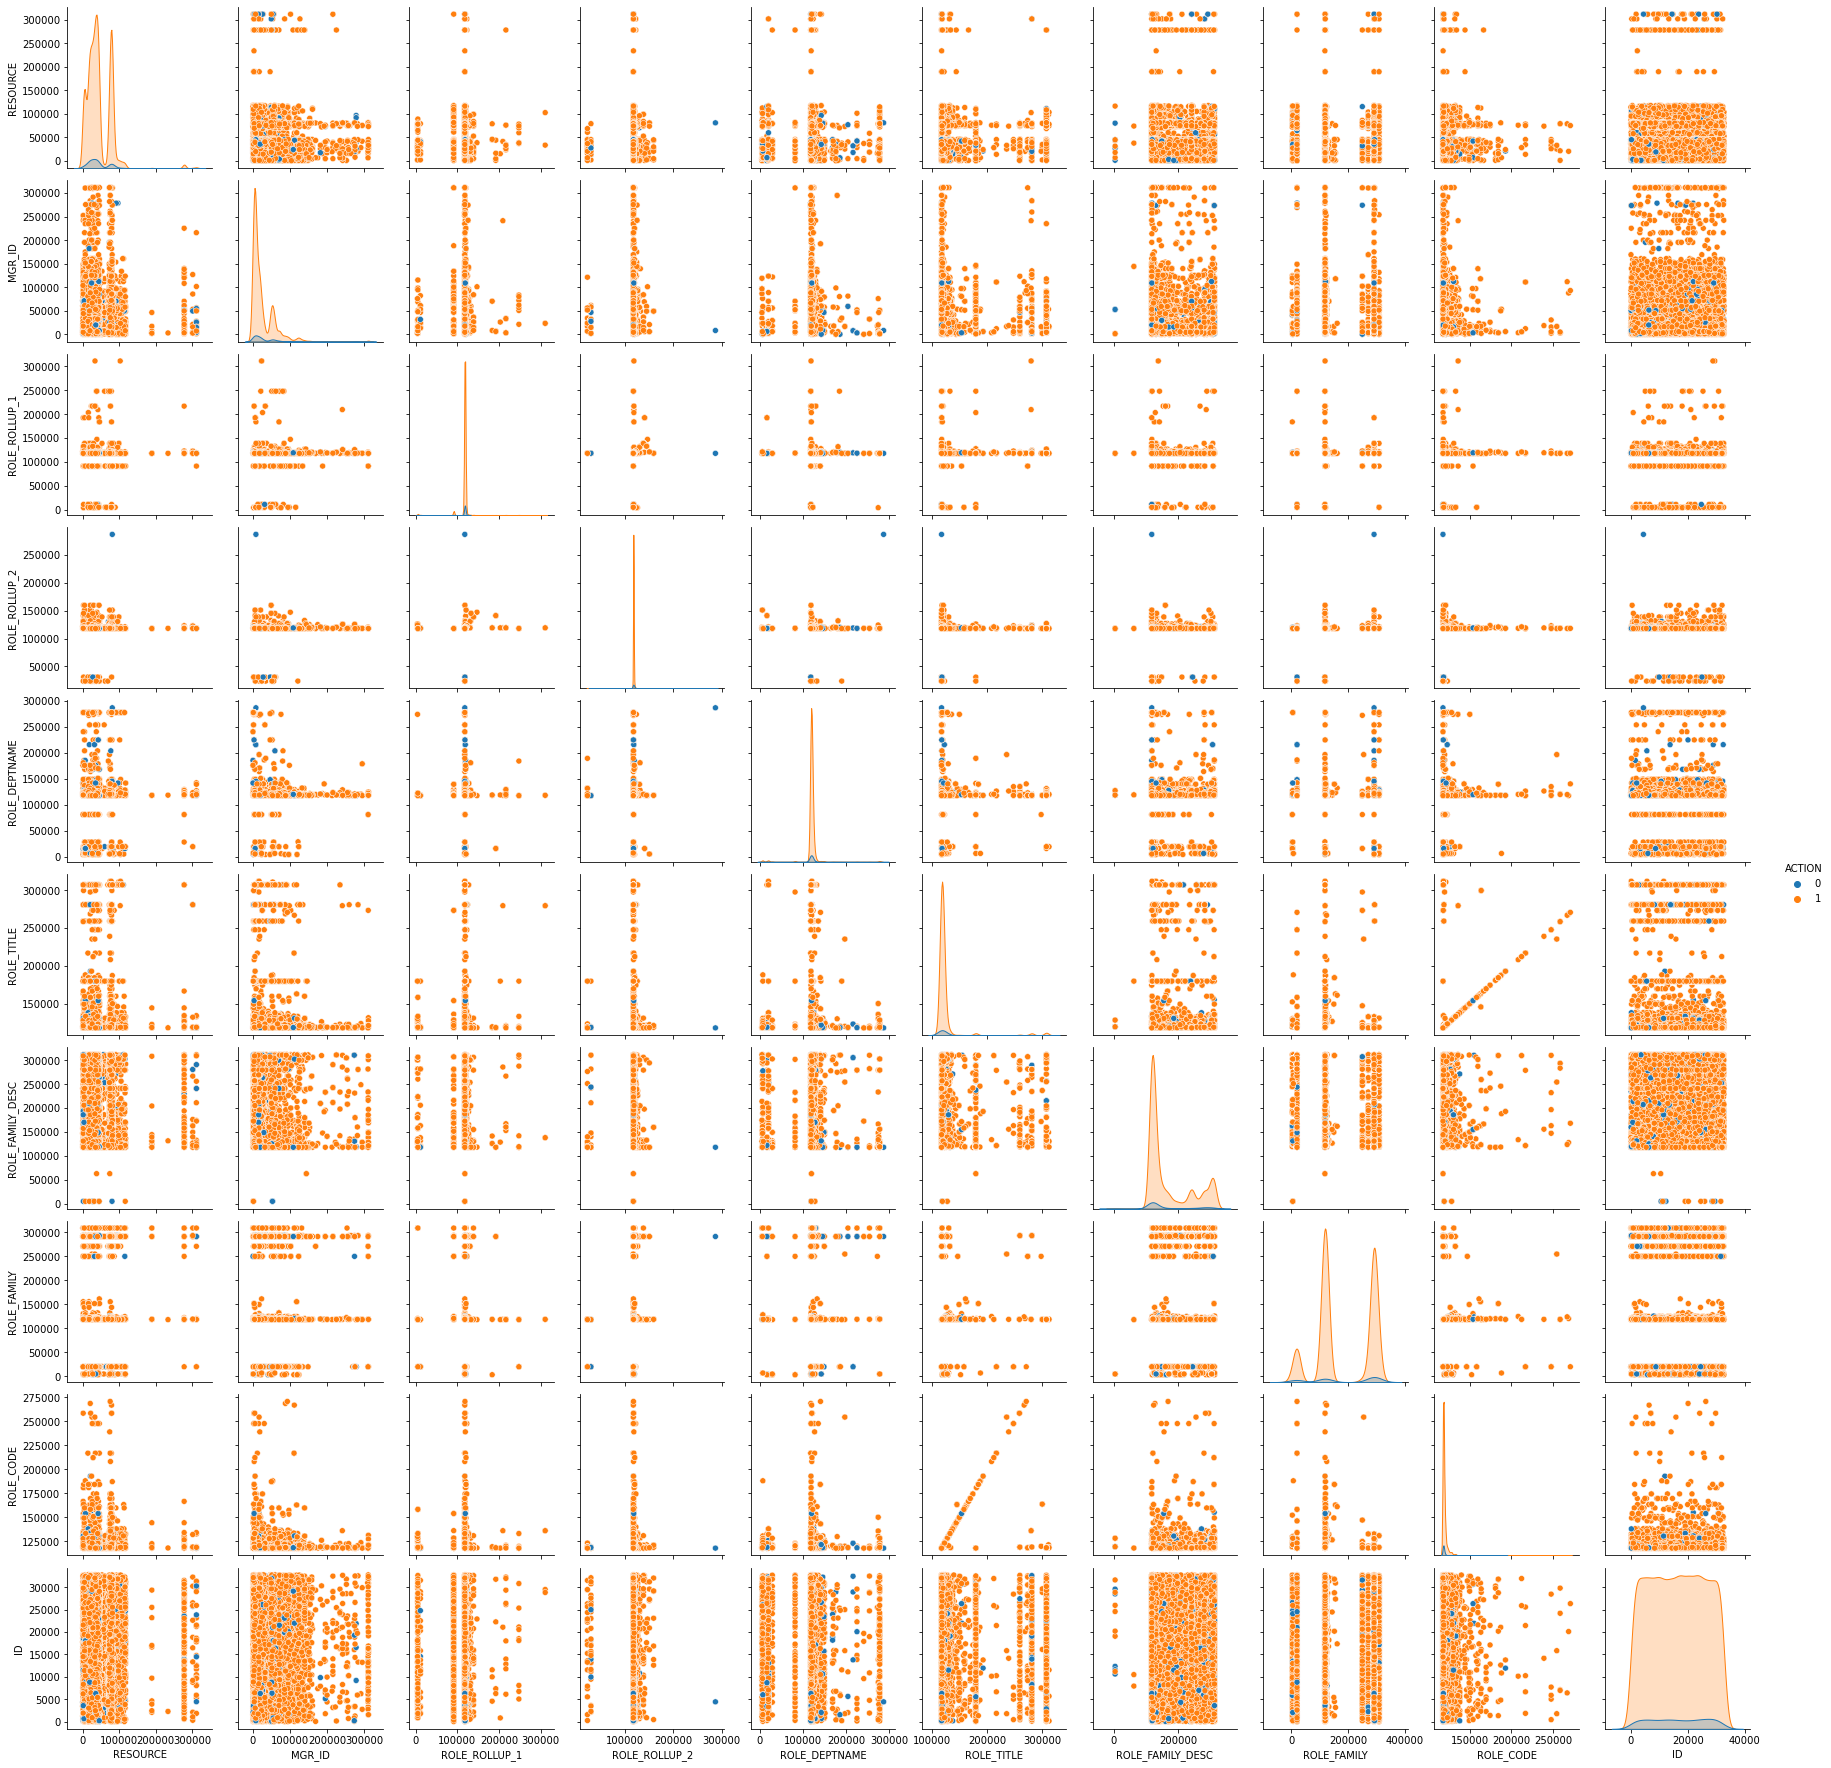

In [18]:
sns.pairplot(train_data,diag_kind='kde', hue='ACTION')

Text(0.5, 1.0, 'Correlation between features')

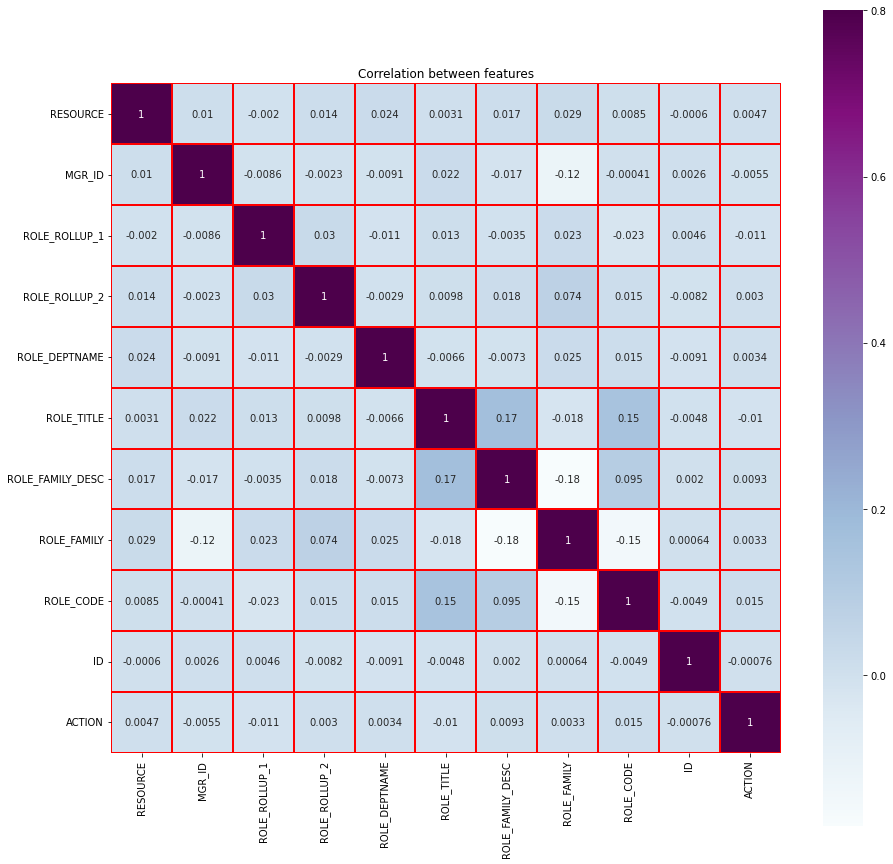

In [19]:
corr = train_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='BuPu',linecolor ='red')
plt.title('Correlation between features')

<a name = Section7></a>

---
# **7. Post Data Processing**
---



<a name = Section71></a>
### **7.1 Data Encoding**

- In this section, we will encode our categorical features such as Sex, Embarked, Title using one hot encoding.

<a name = Section72></a>
### **7.2 Data Scaling**

- In this section, we will scale our features to ensure that it one feature doesn't have more impact than others in terms of weights.

In [26]:
X = train_data.drop(labels=['ID','ACTION'], axis=1)
y = train_data['ACTION']


In [32]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Display the shape of training and testing data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (19660, 9)
y_train shape:  (19660,)
X_test shape:  (4916, 9)
y_test shape:  (4916,)


In [33]:
sc = StandardScaler()
scaledX = sc.fit_transform(X_train)
scaledXT = sc.transform(X_test)

In [34]:
X_train = pd.DataFrame(data=scaledX, columns=X_train.columns.to_list())
X_test = pd.DataFrame(data=scaledXT, columns=X_test.columns.to_list())

In [35]:
X_train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,-0.245712,-0.017882,0.093435,0.017730,0.148835,-0.243280,-0.747518,1.067351,-0.256185
1,-0.183652,-0.321744,0.112446,-0.018656,-0.018206,-0.255491,-0.366488,1.086011,-0.322304
2,-0.709958,-0.580922,0.093435,0.017730,0.033928,-0.226576,-0.519030,-0.648361,-0.165315
3,-0.419021,0.128293,-2.346923,-0.048943,0.029062,-0.069823,-0.672209,-0.627533,0.685752
4,-0.422007,-0.610424,0.093435,0.017730,0.163005,-0.243280,1.034586,1.067351,-0.256185


In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

In [43]:
y_resampled.value_counts()

0    18518
1    18518
Name: ACTION, dtype: int64

In [44]:
y_train.value_counts()

1    18518
0     1142
Name: ACTION, dtype: int64

In [48]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 42, class_weight='balanced')
sv_clf = SVC(random_state=42, class_weight='balanced', probability=True)
dt_clf = DecisionTreeClassifier(random_state = 42, class_weight='balanced')
bag_clf = BaggingClassifier(base_estimator=dt_clf, n_estimators=500, n_jobs=-1, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=500, random_state = 42, class_weight='balanced', n_jobs=-1)
ada_clf = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('dt', dt_clf), ('svc', sv_clf)], voting='soft')
rf_clf = RandomForestClassifier(n_estimators=500, random_state = 42, class_weight='balanced', n_jobs=-1)
ada_clf = AdaBoostClassifier(base_estimator=dt_clf, n_estimators=500, random_state=42)
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state = 42)

In [49]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, bag_clf, voting_clf, rf_clf, ada_clf, gb_clf]

# Create an empty list to append scores and classifier name
train_scores = []
test_scores = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_resampled, y_resampled)

  # Append train and test score to the empty list
  train_scores.append(np.round(a=clf.score(X_resampled, y_resampled), decimals=2))
  test_scores.append(np.round(a=clf.score(X_test, y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Success!
CPU times: user 19min 1s, sys: 6.37 s, total: 19min 7s
Wall time: 23min 19s


In [50]:
# Create an accuracy dataframe from scores and names list
accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores}, index=clf_names)

# View the accuracy of all the classifiers
accuracy_frame.transpose()

,LogisticRegression,SVC,DecisionTreeClassifier,BaggingClassifier,VotingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
Train Accuracy,0.52,0.65,1.00,1.00,1.00,1.00,1.00,0.93
Test Accuracy,0.54,0.61,0.92,0.94,0.92,0.95,0.92,0.91


<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section we will **develop Decision Tree model** 

- Then we will **analyze the results** obtained and **make our observations**.

- For **evaluation purpose** we will **focus** on **Precision**, **Recall** and **Accuracy** scores.

- We will do **hyperparameter tuning** and see if the scores improves. 


In [55]:
#dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_resampled, y_resampled)

# Predicting training and testing labels
y_train_pred_count = rf_clf.predict(X_resampled)
y_test_pred_count = rf_clf.predict(X_test)


train_report = classification_report(y_resampled, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18518
           1       1.00      1.00      1.00     18518

    accuracy                           1.00     37036
   macro avg       1.00      1.00      1.00     37036
weighted avg       1.00      1.00      1.00     37036

                    Testing Report           
              precision    recall  f1-score   support

           0       0.55      0.45      0.50       286
           1       0.97      0.98      0.97      4630

    accuracy                           0.95      4916
   macro avg       0.76      0.71      0.73      4916
weighted avg       0.94      0.95      0.94      4916



In [56]:
#dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

# Predicting training and testing labels
y_train_pred_count = rf_clf.predict(X_train)
y_test_pred_count = rf_clf.predict(X_test)


train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      1.00      1.00     18518

    accuracy                           1.00     19660
   macro avg       1.00      1.00      1.00     19660
weighted avg       1.00      1.00      1.00     19660

                    Testing Report           
              precision    recall  f1-score   support

           0       0.68      0.35      0.47       286
           1       0.96      0.99      0.98      4630

    accuracy                           0.95      4916
   macro avg       0.82      0.67      0.72      4916
weighted avg       0.94      0.95      0.95      4916



In [57]:
#dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')
bag_clf.fit(X_resampled, y_resampled)

# Predicting training and testing labels
y_train_pred_count = bag_clf.predict(X_resampled)
y_test_pred_count = bag_clf.predict(X_test)


train_report = classification_report(y_resampled, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18518
           1       1.00      1.00      1.00     18518

    accuracy                           1.00     37036
   macro avg       1.00      1.00      1.00     37036
weighted avg       1.00      1.00      1.00     37036

                    Testing Report           
              precision    recall  f1-score   support

           0       0.50      0.45      0.48       286
           1       0.97      0.97      0.97      4630

    accuracy                           0.94      4916
   macro avg       0.74      0.71      0.72      4916
weighted avg       0.94      0.94      0.94      4916



<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Action'>

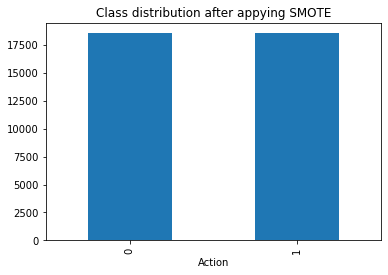

In [13]:

pd.Series(y_resampled).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='Action')

In [61]:
test_data1=test_data.drop(labels='ID',axis=1)

In [62]:
test_pred_count = rf_clf.predict(test_data1)

In [64]:
test_pred_count.size

8193

In [65]:
data = {'ID':store_id,
        'label':test_pred_count}
 
# Create DataFrame
df = pd.DataFrame(data)

In [66]:
df.head()

,ID,label
0,18245,1
1,9226,1
2,27195,1
3,6478,1
4,4813,1


In [68]:
df.to_csv('submission.csv', index=False, header=False)# exporting the submission file

**Observations:**

- We can observe that we **model** is **performing well** on **training data** and on **testing set** 



<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- The high accuracy of the model enables the company to automate the laboriuous and tedious task of manually classifying the gender of the customer.




<a name = Section92></a>
### **9.2 Actionable Insights**

- With more incoming data the ML algorith can imporve its accuracy over the time and classify the gender of customer based on its voice
- Company may endeavour to have voice samples from various ethnicities 